In [1]:
%pylab inline
import cluster_utils as cu
import itertools
import pandas as pd
import dateutil

Populating the interactive namespace from numpy and matplotlib


#plot the the frequency of edges over time

In [2]:
clustersdf = cu.get_clusters_with_keyword(date='20150618', threshold=5, keyword='charleston')

out = []
for i, row in clustersdf.iterrows():
    datetemp = row['date']
    for i in range(0,10):
        current_date = row['date']
        row[current_date] = cu.cluster_post_volume(row)['count'].mean()
        
        next_date = cu.dates[cu.dates.index(current_date)+1]
        row['date'] = next_date
        
    row['date'] = datetemp
    out.append(row)    
    
outdf = pd.DataFrame(out)


In [6]:
outdf

,date,elements,id,k-clique,keyword,name,size,threshold,20150618,20150619,20150620,20150621,20150622,20150623,20150624,20150625,20150626,20150627
0,20150618,"set([ameshooting, racism, charlestonshooting, ...",20150618_k5_t5_i83,5,charleston,83,6,5,53.866667,11.733333,4.466667,4.333333,1.800000,0.866667,0.800000,0.266667,0,0
1,20150618,"set([uniteblue, rednationrising, gunsense, tgd...",20150618_k4_t5_i15,4,charleston,15,25,5,9.170000,6.786667,5.693333,4.873333,5.983333,5.683333,6.026667,3.580000,0,0
2,20150618,"set([hatecrime, dylannroof, walterscott, cleme...",20150618_k4_t5_i54,4,charleston,54,13,5,19.089744,8.217949,2.961538,2.089744,1.179487,0.820513,0.833333,0.076923,0,0
3,20150618,"set([charlestonchurchshooting, chsnews, emanue...",20150618_k4_t5_i140,4,charleston,140,7,5,33.952381,6.571429,1.809524,4.095238,1.714286,0.571429,0.761905,0.000000,0,0
4,20150618,"set([latinos, renewus, amemassacre, dylanroof,...",20150618_k3_t5_i4,3,charleston,4,100,5,1.448485,0.820808,0.571313,0.462626,0.622424,0.653535,0.588081,0.308687,0,0


In [40]:
outdf

,date,elements,id,k-clique,keyword,name,size,threshold,20150618,20150619,20150620,20150621,20150622,20150623,20150624,20150625,20150626,20150627
0,20150618,"set([ameshooting, racism, charlestonshooting, ...",20150618_k5_t5_i83,5,charleston,83,6,5,53.866667,11.733333,4.466667,4.333333,1.800000,0.866667,0.800000,0.266667,0,0
1,20150618,"set([uniteblue, rednationrising, gunsense, tgd...",20150618_k4_t5_i15,4,charleston,15,25,5,9.170000,6.786667,5.693333,4.873333,5.983333,5.683333,6.026667,3.580000,0,0
2,20150618,"set([hatecrime, dylannroof, walterscott, cleme...",20150618_k4_t5_i54,4,charleston,54,13,5,19.089744,8.217949,2.961538,2.089744,1.179487,0.820513,0.833333,0.076923,0,0
3,20150618,"set([charlestonchurchshooting, chsnews, emanue...",20150618_k4_t5_i140,4,charleston,140,7,5,33.952381,6.571429,1.809524,4.095238,1.714286,0.571429,0.761905,0.000000,0,0
4,20150618,"set([latinos, renewus, amemassacre, dylanroof,...",20150618_k3_t5_i4,3,charleston,4,100,5,1.448485,0.820808,0.571313,0.462626,0.622424,0.653535,0.588081,0.308687,0,0


In [41]:
outdf['date'].apply(lambda x: dateutil.parser.parse(x).strftime('%B %d %Y'))

0    June 18 2015
1    June 18 2015
2    June 18 2015
3    June 18 2015
4    June 18 2015
Name: date, dtype: object

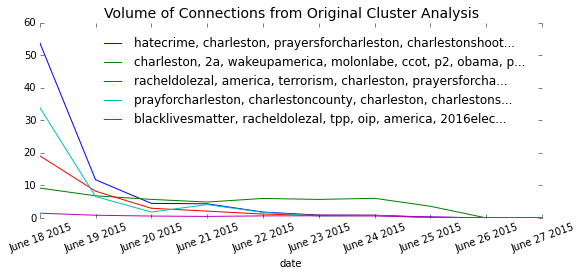

In [50]:

transformed_df = outdf.set_index('id')[outdf.columns[8:]].T
transformed_df['date'] = transformed_df.index
transformed_df.index = transformed_df['date'].apply(lambda x: dateutil.parser.parse(x).strftime('%B %d %Y'))
transformed_df.drop('date', axis=1, inplace=True)

plt.figure(figsize=(8,4))
transformed_df.plot(grid='off', figsize=(9,3.5))
plt.legend([', '.join(reversed(list(x)))[:60]+'...' for x in outdf['elements']],
          bbox_to_anchor=(.1,.7), loc='center left', frameon=False)
plt.title('Volume of Connections from Original Cluster Analysis', fontsize=14)
plt.xticks(rotation=20)
plt.box('off')

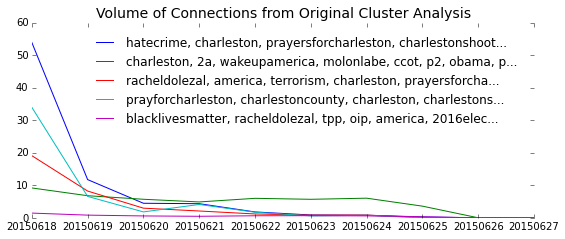

In [38]:
plt.figure(figsize=(8,4))
outdf.set_index('id')[outdf.columns[8:]].T.plot(grid='off', figsize=(9,3.5))

plt.legend([', '.join(reversed(list(x)))[:60]+'...' for x in outdf['elements']],
          bbox_to_anchor=(.1,.7), loc='center left', frameon=False)
plt.title('Volume of Connections from Original Cluster Analysis', fontsize=14)

plt.box('off')

In [36]:
clustersdf = cu.get_clusters_with_keyword(date='20150619', threshold=5, keyword='charleston')

out = []
for i, row in clustersdf.iterrows():
    datetemp = row['date']
    for i in range(0,10):
        current_date = row['date']
        row[current_date] = cu.cluster_post_volume(row)['count'].mean()
        
        next_date = cu.dates[cu.dates.index(current_date)+1]
        row['date'] = next_date
        
    row['date'] = datetemp
    out.append(row)    

outdf = pd.DataFrame(out)
outdf.set_index('id')[outdf.columns[7:]].T.plot()

KeyboardInterrupt: 

# Now we plot the size of the clusters that actually show up each day, and tie them together.

In [29]:
current_clusters = clustersdf
clusters = [current_clusters]
transitions = []
for i in range(5):
    print current_clusters['date'].iloc[0]
    next_clusters, transition = cu.get_next_clusters(current_clusters, .2)
    clusters.append(next_clusters)
    transitions.append(transition)
    current_clusters = next_clusters

manydays = pd.concat(clusters)
transitionsdf = pd.concat(transitions)

20150618
20150619
20150620
20150621
20150622


In [52]:
manydays['mean volume'] = manydays.apply(lambda x: cu.cluster_post_volume(x).mean(), axis=1)
manydays['realdate'] = manydays['date'].apply(dateutil.parser.parse)
manydays.index = range(len(manydays))
manydays

,date,elements,id,k-clique,keyword,name,size,threshold,mean volume,realdate
0,20150618,"set([ameshooting, racism, charlestonshooting, ...",20150618_k5_t5_i83,5,charleston,83,6,5,53.866667,2015-06-18
1,20150618,"set([uniteblue, rednationrising, gunsense, tgd...",20150618_k4_t5_i15,4,charleston,15,25,5,9.170000,2015-06-18
2,20150618,"set([hatecrime, dylannroof, walterscott, cleme...",20150618_k4_t5_i54,4,charleston,54,13,5,19.089744,2015-06-18
3,20150618,"set([charlestonchurchshooting, chsnews, emanue...",20150618_k4_t5_i140,4,charleston,140,7,5,33.952381,2015-06-18
4,20150618,"set([latinos, renewus, amemassacre, dylanroof,...",20150618_k3_t5_i4,3,charleston,4,100,5,1.448485,2015-06-18
5,20150619,"set([uniteblue, rednationrising, gunsense, tgd...",20150619_k4_t5_i30,4,NaN,30,22,5,8.679654,2015-06-19
6,20150619,"set([dylannroof, itsaracething, ameshooting, r...",20150619_k4_t5_i159,4,NaN,159,8,5,25.321429,2015-06-19
7,20150619,"set([takeitdown, charleston, confederateflag, ...",20150619_k4_t5_i103,4,NaN,103,4,5,20.000000,2015-06-19
8,20150619,"set([makedclisten, uniteblue, latinos, prayfor...",20150619_k3_t5_i13,3,NaN,13,64,5,1.985119,2015-06-19
9,20150620,"set([p2, uniteblue, ccot, tcot, ycot, nra, wak...",20150620_k4_t5_i6,4,NaN,6,18,5,11.359477,2015-06-20


In [ ]:
plt.text()

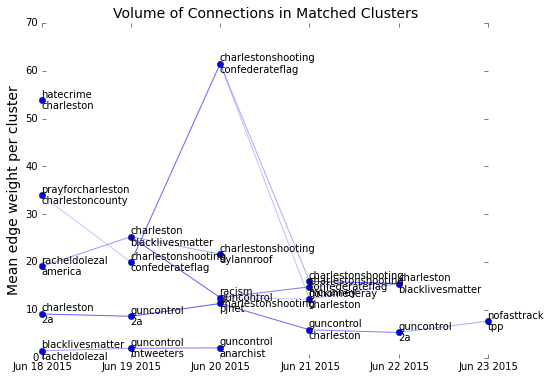

In [72]:
plt.figure(figsize(8,6))
points = plt.plot(manydays['realdate'], manydays['mean volume'], 'bo')
points[0].set_clip_on(False)

for a, row in transitionsdf.iterrows():
    for b, likelihood in row.iteritems():
        if likelihood>0:
            pt_a = manydays[manydays['id']==a].iloc[0]
            pt_b = manydays[manydays['id']==b].iloc[0]
            plt.plot([pt_a['realdate'], pt_b['realdate']], [pt_a['mean volume'], pt_b['mean volume']], 
                     'b', alpha=likelihood)

for i, row in manydays.iterrows():
    plt.text(x=row['realdate'], y=row['mean volume'], 
             s='\n'.join(reversed(list(row['elements'])[-2:])),
             va='center')

#plt.xlim(manydays['realdate'].min(), manydays['realdate'].max())
plt.box('off')
plt.title('Volume of Connections in Matched Clusters', fontsize=14)
plt.ylabel('Mean edge weight per cluster', fontsize=14)

don't want to just know how many people are using a particular word - want to know how many people are making connections between a particular set of concepts.

One way is to track the volume of edges from day 0's clusters. This gets around the issue of clusters falling out due to clusters being missing, and the transition issues...
